# Covid-19 Cases Prediction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Datasets

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/country-mapping-iso-continent-region")

print("Path to dataset files:", path)

100%|██████████| 4.96k/4.96k [00:00<00:00, 5.15MB/s]

Extracting files...
Path to dataset files: C:\Users\tahaa\.cache\kagglehub\datasets\andradaolteanu\country-mapping-iso-continent-region\versions\1


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("antgoldbloom/covid19-data-from-john-hopkins-university")

print("Path to dataset files:", path)

100%|██████████| 10.6M/10.6M [08:02<00:00, 22.9kB/s]

Extracting files...
Path to dataset files: C:\Users\tahaa\.cache\kagglehub\datasets\antgoldbloom\covid19-data-from-john-hopkins-university\versions\931


## Data Preparation

In [21]:
df_confirm = pd.read_csv(r"Datasets/covid19-data-from-john-hopkins-university/versions/931/CONVENIENT_global_confirmed_cases.csv")
df_deaths = pd.read_csv(r"Datasets/covid19-data-from-john-hopkins-university/versions/931/CONVENIENT_global_deaths.csv")

In [22]:
df_confirm

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,3/6/23,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0


In [23]:
df_deaths

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,3/6/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [24]:
df_world = pd.DataFrame({"Country": [], "Cases": [], "Deaths": []})

df_world["Country"] = df_confirm.iloc[:, 1:].columns

cases = []
for c in df_world["Country"]:
    cases.append(pd.to_numeric(df_confirm[c][1:]).sum())
df_world["Cases"] = cases

deaths = []
for d in df_world["Country"]:
    deaths.append(pd.to_numeric(df_deaths[d][1:]).sum())
df_world["Deaths"] = deaths

df_world

,Country,Cases,Deaths
0,Afghanistan,209451.0,7896.0
1,Albania,334457.0,3598.0
2,Algeria,271496.0,6881.0
3,Andorra,47890.0,165.0
4,Angola,105288.0,1933.0
...,...,...,...
284,West Bank and Gaza,703228.0,5708.0
285,Winter Olympics 2022,535.0,0.0
286,Yemen,11945.0,2159.0
287,Zambia,343135.0,4057.0


In [25]:
countries = []
for country in df_world["Country"]:
    if '.' in country:
        country = country.split('.')[0]
    if '(' in country:
        country = country.split('(')[0]
    country = country.strip()
    
    countries.append(country)
    
df_world["Country"] = countries

df_world = df_world.groupby("Country").agg({
    "Cases": "sum",
    "Deaths": "sum"
}).reset_index()

df_world    

,Country,Cases,Deaths
0,Afghanistan,209451.0,7896.0
1,Albania,334457.0,3598.0
2,Algeria,271496.0,6881.0
3,Andorra,47890.0,165.0
4,Angola,105288.0,1933.0
...,...,...,...
195,West Bank and Gaza,703228.0,5708.0
196,Winter Olympics 2022,535.0,0.0
197,Yemen,11945.0,2159.0
198,Zambia,343135.0,4057.0


## Data Visuliualization

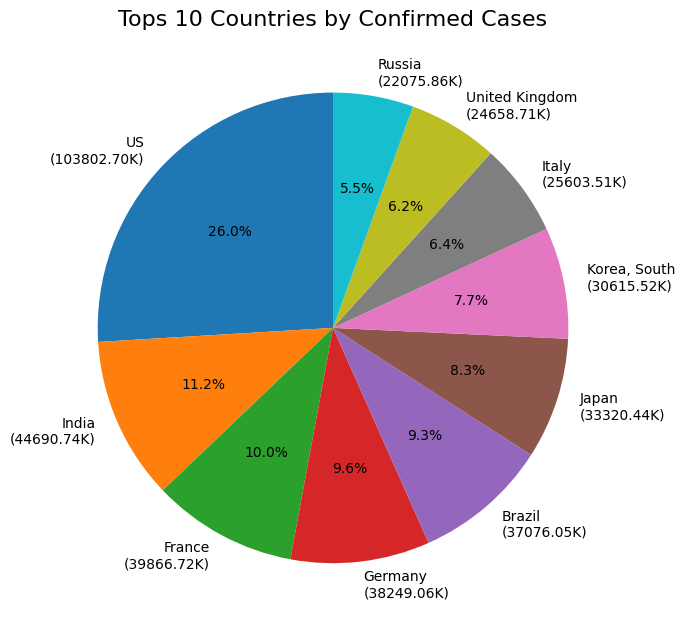

In [49]:
top_cases_countries = df_world.sort_values(by="Cases", ascending=False).head(10)
pie_cases_labels = [f"{Country}\n({Cases/1000:.2f}K)" for Country, Cases in zip(top_cases_countries["Country"], top_cases_countries["Cases"])]

plt.figure(figsize=(7, 7))
plt.pie(top_cases_countries["Cases"],
        labels=pie_cases_labels,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Tops 10 Countries by Confirmed Cases", fontsize=16)
plt.tight_layout()
plt.show()

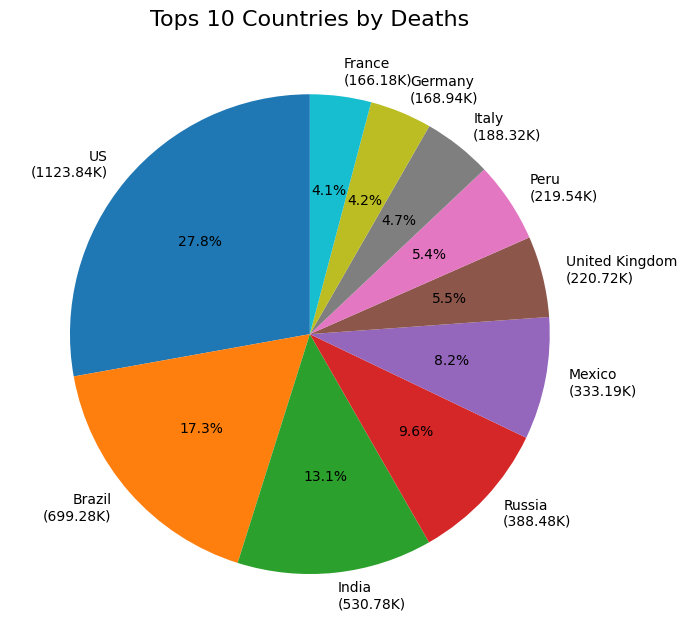

In [50]:
top_deaths_countries = df_world.sort_values(by="Deaths", ascending=False).head(10)
pie_deaths_labels = [f"{Country}\n({Deaths/1000:.2f}K)" for Country, Deaths in zip(top_deaths_countries["Country"], top_deaths_countries["Deaths"])]

plt.figure(figsize=(7, 7))
plt.pie(top_deaths_countries["Deaths"],
       labels=pie_deaths_labels,
       autopct='%1.1f%%',
       startangle=90)
plt.title("Tops 10 Countries by Deaths", fontsize=16)
plt.tight_layout()
plt.show()

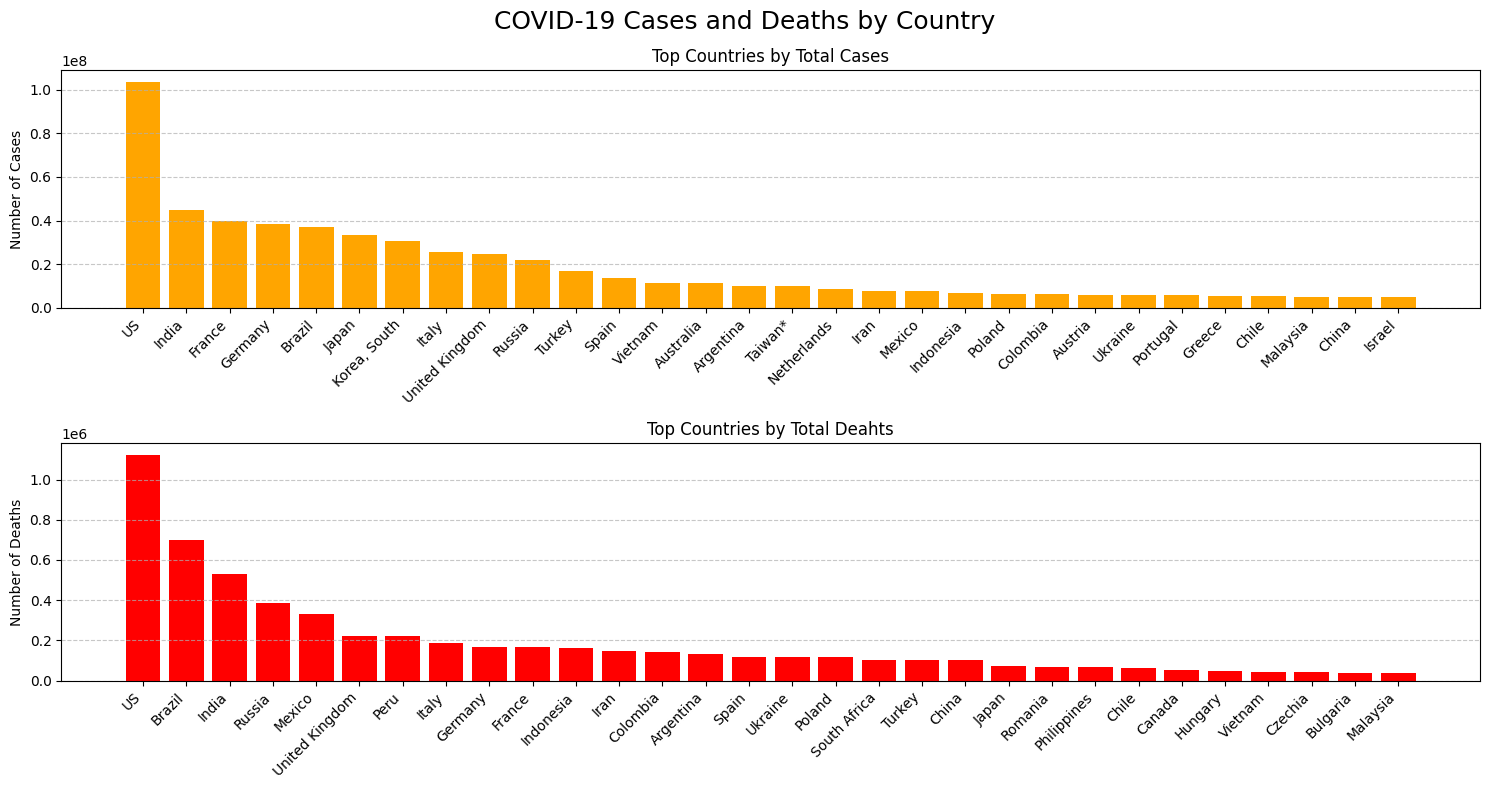

In [60]:
top_cases_countries = df_world.sort_values(by="Cases", ascending=False).head(30)
pie_cases_labels = [f"{Country}\n({Cases/1000:.2f}K)" for Country, Cases in zip(top_cases_countries["Country"], top_cases_countries["Cases"])]

top_deaths_countries = df_world.sort_values(by="Deaths", ascending=False).head(30)
pie_deaths_labels = [f"{Country}\n({Deaths/1000:.2f}K)" for Country, Deaths in zip(top_deaths_countries["Country"], top_deaths_countries["Deaths"])]

plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.bar(top_cases_countries["Country"], top_cases_countries["Cases"], color="orange")
plt.title("Top Countries by Total Cases")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
plt.bar(top_deaths_countries["Country"], top_deaths_countries["Deaths"], color="red")
plt.title("Top Countries by Total Deahts")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle("COVID-19 Cases and Deaths by Country", fontsize=18)
plt.tight_layout()
plt.show()